In [10]:
import pandas as pd
df = pd.read_csv('all_uv_data.csv')

In [11]:
df.shape

(1578960, 27)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578960 entries, 0 to 1578959
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   날짜           1578960 non-null  int64  
 1   시간_분         1578960 non-null  int64  
 2   관측소지점        1578960 non-null  int64  
 3   경도           1578960 non-null  float64
 4   위도           1578960 non-null  float64
 5   자외선지수        1578960 non-null  float64
 6   파랑_가시밴드      1578960 non-null  float64
 7   초록_가시밴드      1578960 non-null  float64
 8   빨강_가시밴드      1578960 non-null  float64
 9   식생_가시밴드      1578960 non-null  float64
 10  권운_밴드        1578960 non-null  float64
 11  눈/얼음_가시밴드    1578960 non-null  float64
 12  야간안개/하층운_밴드  1578960 non-null  float64
 13  상층_수증기_밴드    1578960 non-null  float64
 14  중층_수증기_밴드    1578960 non-null  float64
 15  하층_수증기_밴드    1578960 non-null  float64
 16  구름상_밴드       1578960 non-null  float64
 17  오존_밴드        1578960 non-null  float64
 18  대기

In [13]:
# 공지사항에 따라 컬럼명 변경 : 권운=밴드5, 눈/얼음=밴드6, 경위도 변경
df = df.rename(columns={'눈/얼음_가시밴드':'권운_밴드','권운_밴드':'눈/얼음_가시밴드', '위도':'경도','경도':'위도'})

In [14]:
pd.options.display.max_rows =4000
pd.options.display.max_columns = 30

In [15]:
# 결측값 확인
df.isnull().sum()

날짜             0
시간_분           0
관측소지점          0
위도             0
경도             0
자외선지수          0
파랑_가시밴드        0
초록_가시밴드        0
빨강_가시밴드        0
식생_가시밴드        0
눈/얼음_가시밴드      0
권운_밴드          0
야간안개/하층운_밴드    0
상층_수증기_밴드      0
중층_수증기_밴드      0
하층_수증기_밴드      0
구름상_밴드         0
오존_밴드          0
대기창_밴드         0
깨끗한_대기창_밴드     0
오염된_대기창_밴드     0
이산화탄소_밴드       0
태양천정각          0
위성천정각          0
대기외일사량         0
관측고도           0
지면타입           0
dtype: int64

In [16]:
# 날짜 데이터타입 변경
df['날짜']= df['날짜'].astype('str')

In [17]:
df['날짜_new']= pd.to_datetime(df['날짜'])

In [18]:
df['날짜_연도']=df['날짜_new'].dt.year
df['날짜_월']=df['날짜_new'].dt.month

In [19]:
# 계절 컬럼 생성 : 1 봄, 2 여름, 3 가을, 4 겨울
def func(x) :
    if 3 <= x <= 5 :
        return "1"
    elif 6 <= x <= 8 :
        return "2"
    elif 9 <= x <= 11 :
        return "3"    
    else :
        return "4"
df['계절'] = df["날짜_월"].apply(lambda x : func(x))

In [20]:
df['계절'].loc[df['계절'] == 1 ] ="Spring"
df['계절'].loc[df['계절'] == 2 ] ="Summer"
df['계절'].loc[df['계절'] == 3 ] ="Autumn"
df['계절'].loc[df['계절'] == 4 ] ="Winter"

C:\Users\ghaud\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578960 entries, 0 to 1578959
Data columns (total 31 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   날짜           1578960 non-null  object        
 1   시간_분         1578960 non-null  int64         
 2   관측소지점        1578960 non-null  int64         
 3   위도           1578960 non-null  float64       
 4   경도           1578960 non-null  float64       
 5   자외선지수        1578960 non-null  float64       
 6   파랑_가시밴드      1578960 non-null  float64       
 7   초록_가시밴드      1578960 non-null  float64       
 8   빨강_가시밴드      1578960 non-null  float64       
 9   식생_가시밴드      1578960 non-null  float64       
 10  눈/얼음_가시밴드    1578960 non-null  float64       
 11  권운_밴드        1578960 non-null  float64       
 12  야간안개/하층운_밴드  1578960 non-null  float64       
 13  상층_수증기_밴드    1578960 non-null  float64       
 14  중층_수증기_밴드    1578960 non-null  float64       
 15  하층_수증기_밴드    15

## 자외선지수, 가시채널, 근적외채널 -999값 결측치로 처리 후 결측치 보간법 사용하여 처리 예정

In [22]:
import numpy as np

df = df.replace(-999, np.NaN)
df.head()

,날짜,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,...,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_new,날짜_연도,날짜_월,계절
0,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,268.21695,241.02138,250.86386,...,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,2020-01-01,2020,1,4
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,0.0003,0.00000,268.21695,240.43948,249.09365,...,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,2020-01-01,2020,1,4
2,20200101,0,108,126.96500,37.57100,NaN,0.00000,0.00000,-0.00089,-0.00075,-0.0006,0.00000,252.42750,239.67525,248.06191,...,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,2020-01-01,2020,1,4
3,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,0.0000,-0.00065,253.87311,239.41633,247.94558,...,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,2020-01-01,2020,1,4
4,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,0.0006,-0.00065,261.68631,239.67525,247.77042,...,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,2020-01-01,2020,1,4


In [23]:
df.isnull().sum()

날짜                 0
시간_분               0
관측소지점              0
위도                 0
경도                 0
자외선지수          53207
파랑_가시밴드        18060
초록_가시밴드        18060
빨강_가시밴드        18060
식생_가시밴드        18060
눈/얼음_가시밴드      18060
권운_밴드          18060
야간안개/하층운_밴드    18066
상층_수증기_밴드      18060
중층_수증기_밴드      18060
하층_수증기_밴드      18060
구름상_밴드         18060
오존_밴드          18060
대기창_밴드         18060
깨끗한_대기창_밴드     18060
오염된_대기창_밴드     18060
이산화탄소_밴드       18060
태양천정각              0
위성천정각              0
대기외일사량             0
관측고도               0
지면타입               0
날짜_new             0
날짜_연도              0
날짜_월               0
계절                 0
dtype: int64

In [24]:
df.describe()

,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_연도,날짜_월
count,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.525753e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560894e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06
mean,1.175000e+03,1.272000e+02,1.278316e+02,3.610407e+01,1.096784e+00,9.956193e-02,9.584467e-02,8.884099e-02,1.057123e-01,1.196267e-02,6.805803e-02,2.793423e+02,2.367707e+02,2.448515e+02,2.516733e+02,2.701122e+02,2.500747e+02,2.717897e+02,2.712438e+02,2.693903e+02,2.580199e+02,8.898176e+01,4.211422e+01,-3.938039e-02,6.863933e+01,2.400000e+00,2.020499e+03,6.519836e+00
std,6.924295e+02,3.555129e+01,1.376363e+00,1.182672e+00,1.976032e+00,1.532340e-01,1.524747e-01,1.524982e-01,1.697257e-01,3.775177e-02,1.028435e-01,1.678997e+01,6.325418e+00,7.934983e+00,9.410114e+00,1.677884e+01,9.943836e+00,1.761015e+01,1.793412e+01,1.732307e+01,1.269911e+01,3.806119e+01,1.339209e+00,5.437120e+00,4.635743e+01,1.254326e+00,4.999997e-01,3.449552e+00
min,0.000000e+00,1.300000e+01,1.261600e+02,3.330000e+01,0.000000e+00,-1.133000e-02,-1.141000e-02,-1.192000e-02,-1.197000e-02,-1.208000e-02,-1.290000e-02,1.527700e+02,1.964636e+02,1.952607e+02,1.954363e+02,1.945446e+02,2.126870e+02,1.944925e+02,1.938486e+02,1.938772e+02,1.962145e+02,9.868750e+00,3.896359e+01,-9.630860e+00,2.280000e+00,0.000000e+00,2.020000e+03,1.000000e+00
25%,5.875000e+02,1.120000e+02,1.266249e+02,3.517294e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.685674e+02,2.328735e+02,2.407902e+02,2.475792e+02,2.603141e+02,2.436699e+02,2.616056e+02,2.607608e+02,2.593173e+02,2.514128e+02,5.856060e+01,4.104849e+01,-4.806660e+00,4.700000e+01,2.000000e+00,2.020000e+03,4.000000e+00
50%,1.175000e+03,1.330000e+02,1.273721e+02,3.603259e+01,0.000000e+00,1.020000e-02,8.550000e-03,5.360000e-03,6.130000e-03,3.000000e-04,2.580000e-03,2.808032e+02,2.371707e+02,2.460045e+02,2.538560e+02,2.733349e+02,2.505633e+02,2.750608e+02,2.748170e+02,2.733020e+02,2.608939e+02,8.885167e+01,4.202608e+01,1.785500e-02,6.894000e+01,3.000000e+00,2.020000e+03,7.000000e+00
75%,1.762500e+03,1.520000e+02,1.290320e+02,3.747772e+01,1.400000e+00,1.444600e-01,1.328700e-01,1.114600e-01,1.545600e-01,2.720000e-03,1.141600e-01,2.915966e+02,2.411857e+02,2.502367e+02,2.579879e+02,2.826409e+02,2.575002e+02,2.849407e+02,2.848237e+02,2.826561e+02,2.675652e+02,1.198613e+02,4.367046e+01,4.845467e+00,7.238000e+01,3.000000e+00,2.021000e+03,1.000000e+01
max,2.350000e+03,1.650000e+02,1.308986e+02,3.775147e+01,2.360000e+01,1.148280e+00,1.155940e+00,1.122040e+00,1.161110e+00,6.089700e-01,7.107700e-01,3.212326e+02,2.626168e+02,2.721262e+02,2.754439e+02,3.069993e+02,3.072160e+02,3.112966e+02,3.102730e+02,3.051737e+02,2.815333e+02,1.700420e+02,4.395463e+01,9.025490e+00,2.228000e+02,4.000000e+00,2.021000e+03,1.200000e+01


## 태양천정각 90이하(주간)의 음수값 & 태양천정각 90이상(야간) 값 모두 0으로 처리

In [25]:
# 90 이상 야간
df['파랑_가시밴드'].loc[df['태양천정각'] > 90 ] = 0
df['초록_가시밴드'].loc[df['태양천정각'] > 90 ] = 0
df['빨강_가시밴드'].loc[df['태양천정각'] > 90 ] = 0
df['식생_가시밴드'].loc[df['태양천정각'] > 90 ] = 0
df['권운_밴드'].loc[df['태양천정각'] > 90 ] = 0
df['눈/얼음_가시밴드'].loc[df['태양천정각'] > 90 ] = 0

# 90 이하 주간
df['파랑_가시밴드'].loc[df['파랑_가시밴드'] < 0] = 0
df['초록_가시밴드'].loc[df['초록_가시밴드'] < 0] = 0
df['빨강_가시밴드'].loc[df['빨강_가시밴드'] < 0] = 0
df['식생_가시밴드'].loc[df['식생_가시밴드'] < 0] = 0
df['권운_밴드'].loc[df['권운_밴드'] < 0] = 0
df['눈/얼음_가시밴드'].loc[df['눈/얼음_가시밴드'] < 0] = 0

C:\Users\ghaud\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
df.describe()

,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_연도,날짜_월
count,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.525753e+06,1.567529e+06,1.567529e+06,1.567529e+06,1.567529e+06,1.567529e+06,1.567529e+06,1.560894e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.560900e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06
mean,1.175000e+03,1.272000e+02,1.278316e+02,3.610407e+01,1.096784e+00,9.880862e-02,9.519049e-02,8.843942e-02,1.051994e-01,1.192968e-02,6.785998e-02,2.793423e+02,2.367707e+02,2.448515e+02,2.516733e+02,2.701122e+02,2.500747e+02,2.717897e+02,2.712438e+02,2.693903e+02,2.580199e+02,8.898176e+01,4.211422e+01,-3.938039e-02,6.863933e+01,2.400000e+00,2.020499e+03,6.519836e+00
std,6.924295e+02,3.555129e+01,1.376363e+00,1.182672e+00,1.976032e+00,1.524792e-01,1.518888e-01,1.522890e-01,1.695428e-01,3.764947e-02,1.026546e-01,1.678997e+01,6.325418e+00,7.934983e+00,9.410114e+00,1.677884e+01,9.943836e+00,1.761015e+01,1.793412e+01,1.732307e+01,1.269911e+01,3.806119e+01,1.339209e+00,5.437120e+00,4.635743e+01,1.254326e+00,4.999997e-01,3.449552e+00
min,0.000000e+00,1.300000e+01,1.261600e+02,3.330000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.527700e+02,1.964636e+02,1.952607e+02,1.954363e+02,1.945446e+02,2.126870e+02,1.944925e+02,1.938486e+02,1.938772e+02,1.962145e+02,9.868750e+00,3.896359e+01,-9.630860e+00,2.280000e+00,0.000000e+00,2.020000e+03,1.000000e+00
25%,5.875000e+02,1.120000e+02,1.266249e+02,3.517294e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.685674e+02,2.328735e+02,2.407902e+02,2.475792e+02,2.603141e+02,2.436699e+02,2.616056e+02,2.607608e+02,2.593173e+02,2.514128e+02,5.856060e+01,4.104849e+01,-4.806660e+00,4.700000e+01,2.000000e+00,2.020000e+03,4.000000e+00
50%,1.175000e+03,1.330000e+02,1.273721e+02,3.603259e+01,0.000000e+00,6.230000e-03,5.130000e-03,3.280000e-03,3.590000e-03,0.000000e+00,6.400000e-04,2.808032e+02,2.371707e+02,2.460045e+02,2.538560e+02,2.733349e+02,2.505633e+02,2.750608e+02,2.748170e+02,2.733020e+02,2.608939e+02,8.885167e+01,4.202608e+01,1.785500e-02,6.894000e+01,3.000000e+00,2.020000e+03,7.000000e+00
75%,1.762500e+03,1.520000e+02,1.290320e+02,3.747772e+01,1.400000e+00,1.438900e-01,1.323000e-01,1.111600e-01,1.538200e-01,2.720000e-03,1.141600e-01,2.915966e+02,2.411857e+02,2.502367e+02,2.579879e+02,2.826409e+02,2.575002e+02,2.849407e+02,2.848237e+02,2.826561e+02,2.675652e+02,1.198613e+02,4.367046e+01,4.845467e+00,7.238000e+01,3.000000e+00,2.021000e+03,1.000000e+01
max,2.350000e+03,1.650000e+02,1.308986e+02,3.775147e+01,2.360000e+01,1.052540e+00,1.068690e+00,1.122040e+00,1.161110e+00,6.089700e-01,7.107700e-01,3.212326e+02,2.626168e+02,2.721262e+02,2.754439e+02,3.069993e+02,3.072160e+02,3.112966e+02,3.102730e+02,3.051737e+02,2.815333e+02,1.700420e+02,4.395463e+01,9.025490e+00,2.228000e+02,4.000000e+00,2.021000e+03,1.200000e+01


## interpolate를 통해 결측치 보간
 - interpolate : 앞,뒤 값을 통하여 유추하여 좀 더 스마트하게 결측치(NaN)를 채워줌

### 1. 전체 데이터(자외선 데이터 삭제X) : data1

In [27]:
data1 = df.copy()
data1.head()

,날짜,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,...,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_new,날짜_연도,날짜_월,계절
0,20200101,0,13,126.16000,33.30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,241.02138,250.86386,...,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,2020-01-01,2020,1,4
1,20200101,0,105,128.89098,37.75147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,240.43948,249.09365,...,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,2020-01-01,2020,1,4
2,20200101,0,108,126.96500,37.57100,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252.42750,239.67525,248.06191,...,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,2020-01-01,2020,1,4
3,20200101,0,112,126.62490,37.47772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.87311,239.41633,247.94558,...,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,2020-01-01,2020,1,4
4,20200101,0,115,130.89864,37.48129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.68631,239.67525,247.77042,...,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,2020-01-01,2020,1,4


In [28]:
data1.columns

Index(['날짜', '시간_분', '관측소지점', '위도', '경도', '자외선지수', '파랑_가시밴드', '초록_가시밴드',
       '빨강_가시밴드', '식생_가시밴드', '눈/얼음_가시밴드', '권운_밴드', '야간안개/하층운_밴드', '상층_수증기_밴드',
       '중층_수증기_밴드', '하층_수증기_밴드', '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드',
       '오염된_대기창_밴드', '이산화탄소_밴드', '태양천정각', '위성천정각', '대기외일사량', '관측고도', '지면타입',
       '날짜_new', '날짜_연도', '날짜_월', '계절'],
      dtype='object')

In [29]:
data1 = data1[['날짜', '날짜_월', '관측소지점', '자외선지수', '파랑_가시밴드', '초록_가시밴드',
       '빨강_가시밴드', '식생_가시밴드', '권운_밴드', '눈/얼음_가시밴드', '야간안개/하층운_밴드', '상층_수증기_밴드',
       '중층_수증기_밴드', '하층_수증기_밴드', '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드',
       '오염된_대기창_밴드', '이산화탄소_밴드', '태양천정각', '위성천정각', '대기외일사량', '관측고도', '지면타입', '계절']]
data1.head()

,날짜,날짜_월,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,계절
0,20200101,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,241.02138,250.86386,257.12412,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,4
1,20200101,1,105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,240.43948,249.09365,254.80759,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,4
2,20200101,1,108,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252.42750,239.67525,248.06191,251.25534,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,4
3,20200101,1,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.87311,239.41633,247.94558,251.20427,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,4
4,20200101,1,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.68631,239.67525,247.77042,252.43862,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,4


In [30]:
data1_fill = data1.interpolate(inplace=True)

In [31]:
data1.isnull().sum()

날짜             0
날짜_월           0
관측소지점          0
자외선지수          0
파랑_가시밴드        0
초록_가시밴드        0
빨강_가시밴드        0
식생_가시밴드        0
권운_밴드          0
눈/얼음_가시밴드      0
야간안개/하층운_밴드    0
상층_수증기_밴드      0
중층_수증기_밴드      0
하층_수증기_밴드      0
구름상_밴드         0
오존_밴드          0
대기창_밴드         0
깨끗한_대기창_밴드     0
오염된_대기창_밴드     0
이산화탄소_밴드       0
태양천정각          0
위성천정각          0
대기외일사량         0
관측고도           0
지면타입           0
계절             0
dtype: int64

In [32]:
data1.to_csv('data1.csv')

### 2. 자외선 데이터 삭제O : data2

In [33]:
data2 = df.copy()
data2.head()

,날짜,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,...,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_new,날짜_연도,날짜_월,계절
0,20200101,0,13,126.16000,33.30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,241.02138,250.86386,...,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,2020-01-01,2020,1,4
1,20200101,0,105,128.89098,37.75147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,240.43948,249.09365,...,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,2020-01-01,2020,1,4
2,20200101,0,108,126.96500,37.57100,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252.42750,239.67525,248.06191,...,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,2020-01-01,2020,1,4
3,20200101,0,112,126.62490,37.47772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.87311,239.41633,247.94558,...,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,2020-01-01,2020,1,4
4,20200101,0,115,130.89864,37.48129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.68631,239.67525,247.77042,...,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,2020-01-01,2020,1,4


In [34]:
data2 = data2[['날짜', '날짜_월', '관측소지점', '자외선지수', '파랑_가시밴드', '초록_가시밴드',
       '빨강_가시밴드', '식생_가시밴드', '권운_밴드', '눈/얼음_가시밴드', '야간안개/하층운_밴드', '상층_수증기_밴드',
       '중층_수증기_밴드', '하층_수증기_밴드', '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드',
       '오염된_대기창_밴드', '이산화탄소_밴드', '태양천정각', '위성천정각', '대기외일사량', '관측고도', '지면타입','계절']]
data2.head()

,날짜,날짜_월,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,계절
0,20200101,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,241.02138,250.86386,257.12412,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,4
1,20200101,1,105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,240.43948,249.09365,254.80759,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,4
2,20200101,1,108,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252.42750,239.67525,248.06191,251.25534,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,4
3,20200101,1,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.87311,239.41633,247.94558,251.20427,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,4
4,20200101,1,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.68631,239.67525,247.77042,252.43862,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,4


In [35]:
data2 = data2[data2['자외선지수'].notna()]
data2.isnull().sum()

날짜                 0
날짜_월               0
관측소지점              0
자외선지수              0
파랑_가시밴드        10986
초록_가시밴드        10986
빨강_가시밴드        10986
식생_가시밴드        10986
권운_밴드          10986
눈/얼음_가시밴드      10986
야간안개/하층운_밴드    17304
상층_수증기_밴드      17298
중층_수증기_밴드      17298
하층_수증기_밴드      17298
구름상_밴드         17298
오존_밴드          17298
대기창_밴드         17298
깨끗한_대기창_밴드     17298
오염된_대기창_밴드     17298
이산화탄소_밴드       17298
태양천정각              0
위성천정각              0
대기외일사량             0
관측고도               0
지면타입               0
계절                 0
dtype: int64

In [36]:
data2_fill = data2.interpolate(inplace=True)

In [37]:
data2.isnull().sum()

날짜             0
날짜_월           0
관측소지점          0
자외선지수          0
파랑_가시밴드        0
초록_가시밴드        0
빨강_가시밴드        0
식생_가시밴드        0
권운_밴드          0
눈/얼음_가시밴드      0
야간안개/하층운_밴드    0
상층_수증기_밴드      0
중층_수증기_밴드      0
하층_수증기_밴드      0
구름상_밴드         0
오존_밴드          0
대기창_밴드         0
깨끗한_대기창_밴드     0
오염된_대기창_밴드     0
이산화탄소_밴드       0
태양천정각          0
위성천정각          0
대기외일사량         0
관측고도           0
지면타입           0
계절             0
dtype: int64

In [38]:
data2.to_csv('data2.csv')

## 회귀모델 엘라스틱넷을 통해 data1과 data2 중 값이 더 좋은 데이터 사용할 것
- 엘라스틱 넷(Elastic net)은 릿지 회귀와 라쏘 회귀를 혼합한 모델이다로 alpha를 통해서 릿지 회귀와 라쏘 회귀의 혼합 비율을 조절할 수 있다. 

In [39]:
data1 = data1.drop(['날짜', '날짜_월'], axis=1)
data2 = data2.drop(['날짜', '날짜_월'], axis=1)

### 1. data1 : 전체 (자외선제거 X)

In [40]:
from sklearn.model_selection import train_test_split

X = data1.drop(['자외선지수'], axis=1)
y = data1['자외선지수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

In [41]:
from sklearn.linear_model import ElasticNet

# 엘라스틱넷 적용 선형 회귀 모형 선언
## alpha는 규제의 강도를 의미하며, 높은 숫자일수록 패널티를 크게 부여함
model = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
model.fit(X_train, y_train)

C:\Users\ghaud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.313e+05, tolerance: 4.560e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test) # 예측 값
print(mean_squared_error(y_pred, y_test, squared = False))
print(r2_score(y_test,y_pred))

1.1937578765320913
0.6296132484646986


### 2. data2 : 자외선제거 O

In [43]:
X = data2.drop(['자외선지수'], axis=1)
y = data2['자외선지수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

In [44]:
model = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
model.fit(X_train, y_train)

C:\Users\ghaud\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.206e+05, tolerance: 4.473e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01)

In [45]:
y_pred = model.predict(X_test) # 예측 값
print(mean_squared_error(y_pred, y_test, squared = False))
print(r2_score(y_test,y_pred))

1.1991638443796602
0.6305020374281565


### ** 결과 : 결측치를 보간한 전체데이터 사용(data1)

## 검증데이터가 6월이기 때문에 20,21년의 3,4,5,6,7월 데이터만 볼 것

In [46]:
df

,날짜,시간_분,관측소지점,위도,경도,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,눈/얼음_가시밴드,권운_밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,...,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,날짜_new,날짜_연도,날짜_월,계절
0,20200101,0,13,126.16000,33.30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,241.02138,250.86386,...,267.79360,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0,2020-01-01,2020,1,4
1,20200101,0,105,128.89098,37.75147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.21695,240.43948,249.09365,...,267.05264,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3,2020-01-01,2020,1,4
2,20200101,0,108,126.96500,37.57100,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252.42750,239.67525,248.06191,...,255.94581,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3,2020-01-01,2020,1,4
3,20200101,0,112,126.62490,37.47772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.87311,239.41633,247.94558,...,255.90395,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3,2020-01-01,2020,1,4
4,20200101,0,115,130.89864,37.48129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.68631,239.67525,247.77042,...,262.29638,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4,2020-01-01,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,20211231,2350,146,127.11900,35.84080,0.1,0.0,0.0,0.0,0.0,0.0,0.0,265.85963,232.11139,241.52226,...,263.79575,244.71129,264.82744,264.95943,264.36433,254.82929,162.52921,41.81018,-8.87355,62.90,3,2021-12-31,2021,12,4
1578956,20211231,2350,152,129.33472,35.58250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.80177,231.66682,240.32949,...,258.92109,241.75728,259.19303,257.86443,257.39333,249.08495,163.96606,41.52495,-8.99640,82.00,2,2021-12-31,2021,12,4
1578957,20211231,2350,156,126.89158,35.17294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.51203,232.00088,239.28022,...,259.47443,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3,2021-12-31,2021,12,4
1578958,20211231,2350,159,129.03203,35.10468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.63149,232.54931,239.86289,...,259.61194,242.68420,259.36253,258.24370,256.93511,247.71243,164.15158,40.96396,-8.99480,69.56,3,2021-12-31,2021,12,4


In [47]:
df = pd.read_csv('data1.csv', index_col = 0)

C:\Users\ghaud\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [48]:
df1 = df[(df['날짜_월'] == 3) | (df['날짜_월'] == 4) |(df['날짜_월'] == 5) | (df['날짜_월'] == 6) | (df['날짜_월'] == 7)]
df1.head()

,날짜,날짜_월,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,계절
129600,20200301,3,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.08767,233.40607,242.34145,251.20427,262.67010,245.40340,264.06961,263.13564,261.93565,253.72902,150.70767,38.96359,-8.52329,71.00,0,1
129601,20200301,3,105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.97783,233.51144,242.13835,250.76765,270.95085,248.09458,272.77942,273.03102,272.18208,260.31878,147.70842,43.95463,-8.26618,26.04,3,1
129602,20200301,3,108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.68282,233.40607,242.17228,251.38277,274.30191,250.10372,276.15670,276.46287,275.44535,262.34658,147.23785,43.77999,-8.22832,85.50,3,1
129603,20200301,3,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.42523,233.61643,242.34145,251.68707,273.36632,249.81751,275.20050,275.51001,274.37866,261.88885,147.21335,43.67046,-8.22680,68.99,3,1
129604,20200301,3,115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.18807,234.54509,243.47181,251.61120,272.46501,248.45659,275.15396,274.70636,273.31842,260.70869,148.51155,43.74521,-8.33183,222.80,4,1


In [49]:
df1.describe()

,날짜,날짜_월,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,계절
count,6.609600e+05,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000,660960.000000
mean,2.020552e+07,5.000000,127.200000,1.474797,0.121853,0.118004,0.110868,0.131809,0.082376,0.015969,281.339351,235.900865,244.059319,251.209748,270.720658,250.092546,272.386105,271.758981,269.719316,258.182596,78.635927,42.114224,1.302601,68.639333,2.400000,1.398693
std,5.002024e+03,1.418829,35.551304,2.351593,0.171713,0.171572,0.172724,0.191096,0.112482,0.043214,17.414564,6.504690,8.390206,10.173593,18.118168,9.941045,19.062855,19.469915,18.840461,13.789063,36.760322,1.339209,5.188014,46.357451,1.254327,0.489630
min,2.020030e+07,3.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.769990,201.146600,199.776710,199.540260,200.510830,215.426620,200.110590,199.663520,199.326390,201.053130,9.868750,38.963590,-8.766860,2.280000,0.000000,1.000000
25%,2.020052e+07,4.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,271.190630,231.778600,239.280220,245.961570,259.553040,243.938050,260.520050,259.334130,257.559467,250.051100,45.839530,41.048490,-3.601818,47.000000,2.000000,1.000000
50%,2.020552e+07,5.000000,133.000000,0.100000,0.053820,0.047900,0.034270,0.039200,0.027090,0.000600,283.356560,236.128250,245.387030,254.000020,275.650700,251.278770,277.481420,277.237270,275.573990,262.602120,80.577705,42.026080,1.249755,68.940000,3.000000,1.000000
75%,2.021052e+07,6.000000,152.000000,2.200000,0.168250,0.157970,0.139170,0.197510,0.138030,0.005740,293.899060,240.690170,250.099070,258.424610,284.214560,257.598050,286.614600,286.519370,284.192580,268.731320,112.138050,43.670460,6.303490,72.380000,3.000000,2.000000
max,2.021073e+07,7.000000,165.000000,18.900000,1.040650,1.041320,1.055880,1.133730,0.710770,0.584800,320.364760,258.930020,267.558150,272.672930,306.260500,274.654630,310.363620,309.653650,305.173730,280.571430,154.261260,43.954630,9.025490,222.800000,4.000000,2.000000


### 각 밴드들을 채널별로 평균낸 대표컬럼 생성

In [50]:
data1 = df1[['파랑_가시밴드', '초록_가시밴드', '빨강_가시밴드', '식생_가시밴드']]
df1['Band1'] = data1.mean(axis=1)

data2 = df1[['권운_밴드', '눈/얼음_가시밴드']]
df1['Band2'] = data2.mean(axis=1)

data3 = df1[['야간안개/하층운_밴드']]
df1['Band3'] = data3.mean(axis=1)

data4 = df1[[ '상층_수증기_밴드', '중층_수증기_밴드', '하층_수증기_밴드']]
df1['Band4'] = data4.mean(axis=1)

data5 = df1[[ '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드', '오염된_대기창_밴드', '이산화탄소_밴드']]
df1['Band5'] = data5.mean(axis=1)

C:\Users\ghaud\AppData\Local\Temp/ipykernel_8012/1616499543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Band1'] = data1.mean(axis=1)
C:\Users\ghaud\AppData\Local\Temp/ipykernel_8012/1616499543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Band2'] = data2.mean(axis=1)
C:\Users\ghaud\AppData\Local\Temp/ipykernel_8012/1616499543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

### 태양천정각을 네 범위로 구분해줌(45, 90, 135, 180)

In [51]:
bins = list(range(0, 181, 45))
bins

[0, 45, 90, 135, 180]

In [52]:
bins_label = list(range(1,6,1))
bins_label

[1, 2, 3, 4, 5]

In [53]:
df1["time"] = pd.cut(df1['태양천정각'], bins, right=False, labels=bins_label[:-1])

C:\Users\ghaud\AppData\Local\Temp/ipykernel_8012/648788772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["time"] = pd.cut(df1['태양천정각'], bins, right=False, labels=bins_label[:-1])


In [54]:
df1.columns

Index(['날짜', '날짜_월', '관측소지점', '자외선지수', '파랑_가시밴드', '초록_가시밴드', '빨강_가시밴드',
       '식생_가시밴드', '권운_밴드', '눈/얼음_가시밴드', '야간안개/하층운_밴드', '상층_수증기_밴드',
       '중층_수증기_밴드', '하층_수증기_밴드', '구름상_밴드', '오존_밴드', '대기창_밴드', '깨끗한_대기창_밴드',
       '오염된_대기창_밴드', '이산화탄소_밴드', '태양천정각', '위성천정각', '대기외일사량', '관측고도', '지면타입',
       '계절', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'time'],
      dtype='object')

In [55]:
# 변수 선택
df1 = df1[['관측소지점', '자외선지수', '태양천정각', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5','지면타입', 'time']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660960 entries, 129600 to 1248479
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   관측소지점   660960 non-null  int64   
 1   자외선지수   660960 non-null  float64 
 2   태양천정각   660960 non-null  float64 
 3   Band1   660960 non-null  float64 
 4   Band2   660960 non-null  float64 
 5   Band3   660960 non-null  float64 
 6   Band4   660960 non-null  float64 
 7   Band5   660960 non-null  float64 
 8   지면타입    660960 non-null  int64   
 9   time    660960 non-null  category
dtypes: category(1), float64(7), int64(2)
memory usage: 51.1 MB


### 범주형 데이터를 숫자형으로 처리 가능하게 바꿔줌

In [56]:
df1 = pd.get_dummies(df1, columns = ['관측소지점', 'time'])
df1

,자외선지수,태양천정각,Band1,Band2,Band3,Band4,Band5,지면타입,관측소지점_13,관측소지점_105,관측소지점_108,관측소지점_112,관측소지점_115,관측소지점_131,관측소지점_132,관측소지점_133,관측소지점_138,관측소지점_143,관측소지점_146,관측소지점_152,관측소지점_156,관측소지점_159,관측소지점_165,time_1,time_2,time_3,time_4
129600,0.0,150.70767,0.0,0.0,264.08767,242.317263,258.490570,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
129601,0.0,147.70842,0.0,0.0,272.97783,242.139147,266.226122,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
129602,0.0,147.23785,0.0,0.0,276.68282,242.320373,269.136188,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
129603,0.0,147.21335,0.0,0.0,275.42523,242.548317,268.360308,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
129604,0.0,148.51155,0.0,0.0,274.18807,243.209367,267.468172,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248475,0.1,124.36364,0.0,0.0,296.40523,244.727260,281.981645,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1248476,0.0,125.09137,0.0,0.0,290.86107,244.701323,279.189128,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1248477,0.0,124.95628,0.0,0.0,292.92384,245.047787,278.049852,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1248478,0.0,125.49764,0.0,0.0,286.67795,246.302353,279.210492,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### 모델에 사용할 변수를 최소한으로 하기 위해 같은 단위(K)을 가진 밴드3,4,5를 평균으로 묶어줌
- 밴드1과 2는 변수 중요도가 높았기 때문에 각각 따로 보기로 함

In [57]:
df_band = df1[['Band3', 'Band4', 'Band5']]
df1['Band345'] = pd.DataFrame(df_band.mean(axis=1))

In [58]:
df1

,자외선지수,태양천정각,Band1,Band2,Band3,Band4,Band5,지면타입,관측소지점_13,관측소지점_105,관측소지점_108,관측소지점_112,관측소지점_115,관측소지점_131,관측소지점_132,관측소지점_133,관측소지점_138,관측소지점_143,관측소지점_146,관측소지점_152,관측소지점_156,관측소지점_159,관측소지점_165,time_1,time_2,time_3,time_4,Band345
129600,0.0,150.70767,0.0,0.0,264.08767,242.317263,258.490570,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,254.965168
129601,0.0,147.70842,0.0,0.0,272.97783,242.139147,266.226122,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,260.447699
129602,0.0,147.23785,0.0,0.0,276.68282,242.320373,269.136188,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,262.713127
129603,0.0,147.21335,0.0,0.0,275.42523,242.548317,268.360308,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,262.111285
129604,0.0,148.51155,0.0,0.0,274.18807,243.209367,267.468172,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,261.621869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248475,0.1,124.36364,0.0,0.0,296.40523,244.727260,281.981645,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,274.371378
1248476,0.0,125.09137,0.0,0.0,290.86107,244.701323,279.189128,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,271.583841
1248477,0.0,124.95628,0.0,0.0,292.92384,245.047787,278.049852,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,272.007159
1248478,0.0,125.49764,0.0,0.0,286.67795,246.302353,279.210492,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,270.730265


In [59]:
df1 = df1[['자외선지수', '태양천정각', 'Band1', 'Band2', 'Band345','지면타입', 
       '관측소지점_13', '관측소지점_105', '관측소지점_108', '관측소지점_112', '관측소지점_115',
       '관측소지점_131', '관측소지점_132', '관측소지점_133', '관측소지점_138', '관측소지점_143',
       '관측소지점_146', '관측소지점_152', '관측소지점_156', '관측소지점_159', '관측소지점_165',
       'time_1', 'time_2', 'time_3']]
df1.head()

,자외선지수,태양천정각,Band1,Band2,Band345,지면타입,관측소지점_13,관측소지점_105,관측소지점_108,관측소지점_112,관측소지점_115,관측소지점_131,관측소지점_132,관측소지점_133,관측소지점_138,관측소지점_143,관측소지점_146,관측소지점_152,관측소지점_156,관측소지점_159,관측소지점_165,time_1,time_2,time_3
129600,0.0,150.70767,0.0,0.0,254.965168,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129601,0.0,147.70842,0.0,0.0,260.447699,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129602,0.0,147.23785,0.0,0.0,262.713127,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129603,0.0,147.21335,0.0,0.0,262.111285,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129604,0.0,148.51155,0.0,0.0,261.621869,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df1.reset_index(drop=True,inplace = True)

In [61]:
df1

,자외선지수,태양천정각,Band1,Band2,Band345,지면타입,관측소지점_13,관측소지점_105,관측소지점_108,관측소지점_112,관측소지점_115,관측소지점_131,관측소지점_132,관측소지점_133,관측소지점_138,관측소지점_143,관측소지점_146,관측소지점_152,관측소지점_156,관측소지점_159,관측소지점_165,time_1,time_2,time_3
0,0.0,150.70767,0.0,0.0,254.965168,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,147.70842,0.0,0.0,260.447699,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,147.23785,0.0,0.0,262.713127,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,147.21335,0.0,0.0,262.111285,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,148.51155,0.0,0.0,261.621869,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660955,0.1,124.36364,0.0,0.0,274.371378,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
660956,0.0,125.09137,0.0,0.0,271.583841,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
660957,0.0,124.95628,0.0,0.0,272.007159,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
660958,0.0,125.49764,0.0,0.0,270.730265,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# df : EDA 진행
# df1 : 최종데이터이므로 모델링 진행

# EDA

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( 'ignore' )
import seaborn as sns
from matplotlib import font_manager, rc
import datetime
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [63]:
pd.options.display.max_rows =4000
pd.options.display.max_columns = 30

## 날짜의 경우 float로 되어있음. datetime으로 변경

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578960 entries, 0 to 1578959
Data columns (total 26 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   날짜           1578960 non-null  int64  
 1   날짜_월         1578960 non-null  int64  
 2   관측소지점        1578960 non-null  int64  
 3   자외선지수        1578960 non-null  float64
 4   파랑_가시밴드      1578960 non-null  float64
 5   초록_가시밴드      1578960 non-null  float64
 6   빨강_가시밴드      1578960 non-null  float64
 7   식생_가시밴드      1578960 non-null  float64
 8   권운_밴드        1578960 non-null  float64
 9   눈/얼음_가시밴드    1578960 non-null  float64
 10  야간안개/하층운_밴드  1578960 non-null  float64
 11  상층_수증기_밴드    1578960 non-null  float64
 12  중층_수증기_밴드    1578960 non-null  float64
 13  하층_수증기_밴드    1578960 non-null  float64
 14  구름상_밴드       1578960 non-null  float64
 15  오존_밴드        1578960 non-null  float64
 16  대기창_밴드       1578960 non-null  float64
 17  깨끗한_대기창_밴드   1578960 non-null  float64
 18  오염

In [65]:
df['날짜'] = df['날짜'].astype(str).str[:8]

In [66]:
df['날짜'] = pd.to_datetime(df['날짜'])

## 결측치 없음

In [67]:
df.isnull().sum()

날짜             0
날짜_월           0
관측소지점          0
자외선지수          0
파랑_가시밴드        0
초록_가시밴드        0
빨강_가시밴드        0
식생_가시밴드        0
권운_밴드          0
눈/얼음_가시밴드      0
야간안개/하층운_밴드    0
상층_수증기_밴드      0
중층_수증기_밴드      0
하층_수증기_밴드      0
구름상_밴드         0
오존_밴드          0
대기창_밴드         0
깨끗한_대기창_밴드     0
오염된_대기창_밴드     0
이산화탄소_밴드       0
태양천정각          0
위성천정각          0
대기외일사량         0
관측고도           0
지면타입           0
계절             0
dtype: int64

In [68]:
df.describe()

,날짜_월,관측소지점,자외선지수,파랑_가시밴드,초록_가시밴드,빨강_가시밴드,식생_가시밴드,권운_밴드,눈/얼음_가시밴드,야간안개/하층운_밴드,상층_수증기_밴드,중층_수증기_밴드,하층_수증기_밴드,구름상_밴드,오존_밴드,대기창_밴드,깨끗한_대기창_밴드,오염된_대기창_밴드,이산화탄소_밴드,태양천정각,위성천정각,대기외일사량,관측고도,지면타입,계절
count,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06,1.578960e+06
mean,6.519836e+00,1.272000e+02,1.083405e+00,9.937225e-02,9.572699e-02,8.890688e-02,1.057233e-01,6.822049e-02,1.197963e-02,2.793848e+02,2.367850e+02,2.448700e+02,2.516969e+02,2.701499e+02,2.501112e+02,2.718302e+02,2.712857e+02,2.694308e+02,2.580525e+02,8.898176e+01,4.211422e+01,-3.938039e-02,6.863933e+01,2.400000e+00,2.492476e+00
std,3.449552e+00,3.555129e+01,1.962031e+00,1.525140e-01,1.519343e-01,1.523525e-01,1.695740e-01,1.026654e-01,3.767263e-02,1.677223e+01,6.325279e+00,7.935203e+00,9.411510e+00,1.677663e+01,9.949920e+00,1.760756e+01,1.793263e+01,1.732283e+01,1.269925e+01,3.806119e+01,1.339209e+00,5.437120e+00,4.635743e+01,1.254326e+00,1.117397e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.527700e+02,1.964636e+02,1.952607e+02,1.954363e+02,1.945446e+02,2.126870e+02,1.944925e+02,1.938486e+02,1.938772e+02,1.962145e+02,9.868750e+00,3.896359e+01,-9.630860e+00,2.280000e+00,0.000000e+00,1.000000e+00
25%,4.000000e+00,1.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.685674e+02,2.328735e+02,2.407902e+02,2.476070e+02,2.603528e+02,2.436943e+02,2.616604e+02,2.607975e+02,2.593547e+02,2.514330e+02,5.856060e+01,4.104849e+01,-4.806660e+00,4.700000e+01,2.000000e+00,1.000000e+00
50%,7.000000e+00,1.330000e+02,0.000000e+00,9.060000e-03,7.410000e-03,4.770000e-03,5.240000e-03,1.290000e-03,0.000000e+00,2.808720e+02,2.371707e+02,2.460045e+02,2.538800e+02,2.733820e+02,2.506069e+02,2.751074e+02,2.748644e+02,2.733348e+02,2.609309e+02,8.885167e+01,4.202608e+01,1.785500e-02,6.894000e+01,3.000000e+00,2.000000e+00
75%,1.000000e+01,1.520000e+02,1.300000e+00,1.444600e-01,1.328700e-01,1.117600e-01,1.547100e-01,1.141600e-01,2.720000e-03,2.916420e+02,2.411857e+02,2.502367e+02,2.579879e+02,2.826820e+02,2.575393e+02,2.849965e+02,2.848811e+02,2.827015e+02,2.676001e+02,1.198613e+02,4.367046e+01,4.845467e+00,7.238000e+01,3.000000e+00,3.000000e+00
max,1.200000e+01,1.650000e+02,2.360000e+01,1.052540e+00,1.068690e+00,1.122040e+00,1.161110e+00,7.107700e-01,6.089700e-01,3.212326e+02,2.626168e+02,2.721262e+02,2.754439e+02,3.069993e+02,3.072160e+02,3.112966e+02,3.102730e+02,3.051737e+02,2.815333e+02,1.700420e+02,4.395463e+01,9.025490e+00,2.228000e+02,4.000000e+00,4.000000e+00


## 년도 생성

In [69]:
df['Year'] = df['날짜'].dt.year 

In [70]:
df['Month'] = df['날짜'].dt.month 

# 수치형 변수들의 전체 분포

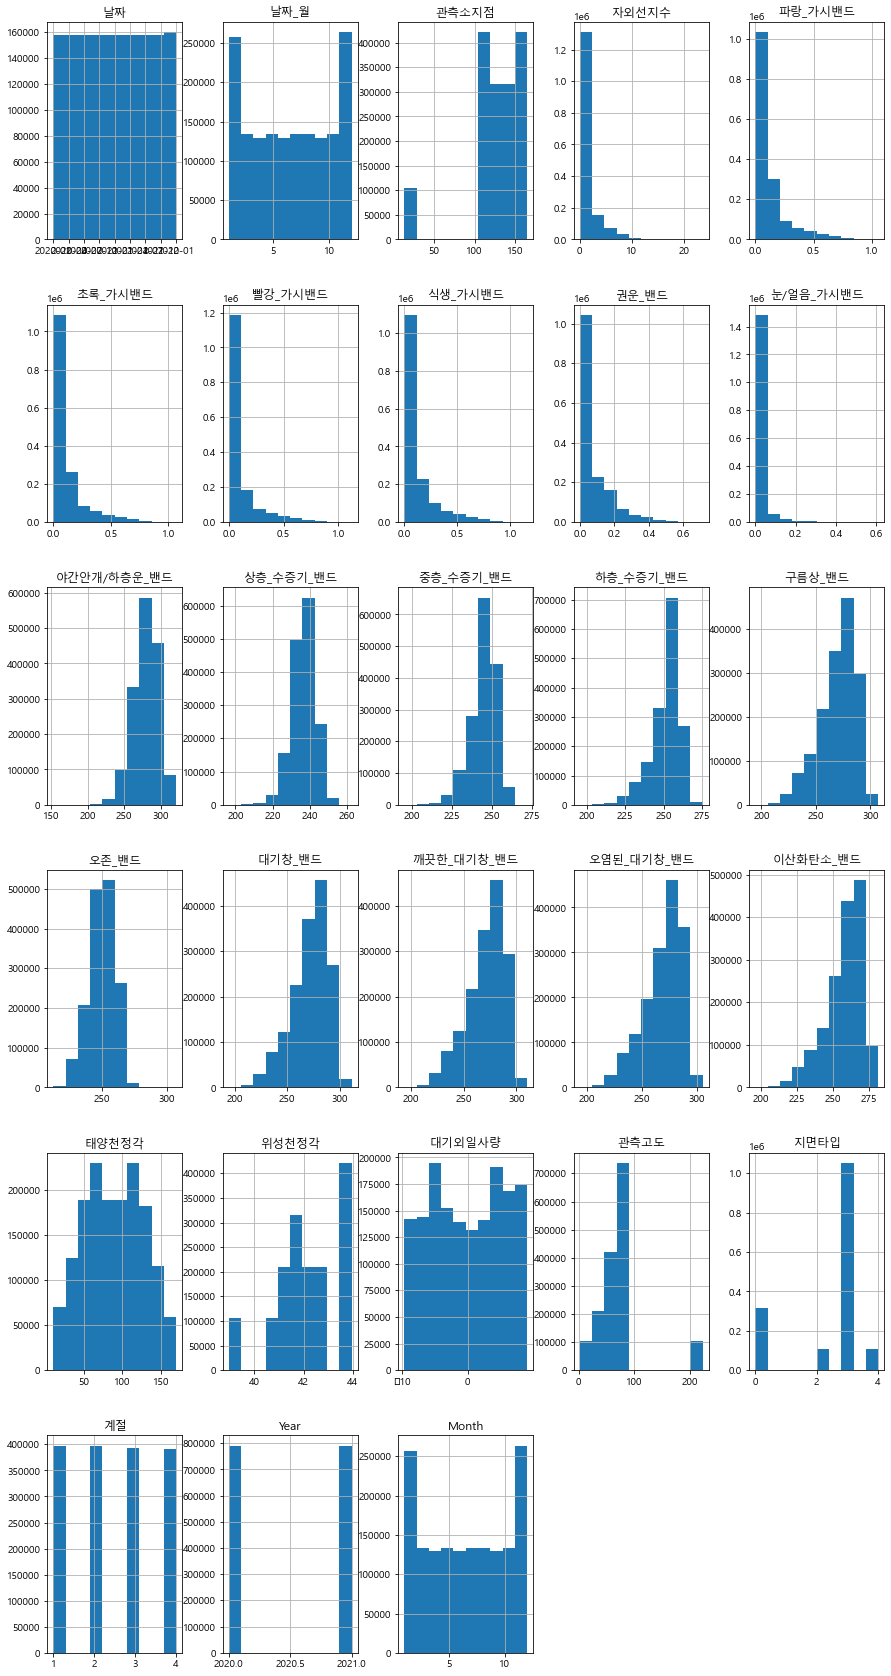

In [71]:
df.hist(figsize=(15,30))
plt.show()

## 년도에 따른 자외선 지수 변화

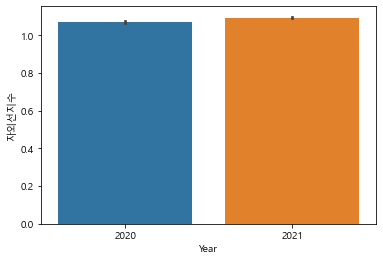

In [72]:
sns.barplot(x=df.Year, y=df.자외선지수)
plt.show()

## 년도별 계절에 따른 자외선 지수 변화

In [73]:
df_2020 = df[df['Year']==2020]
df_2021 = df[df['Year']==2021]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578960 entries, 0 to 1578959
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   날짜           1578960 non-null  datetime64[ns]
 1   날짜_월         1578960 non-null  int64         
 2   관측소지점        1578960 non-null  int64         
 3   자외선지수        1578960 non-null  float64       
 4   파랑_가시밴드      1578960 non-null  float64       
 5   초록_가시밴드      1578960 non-null  float64       
 6   빨강_가시밴드      1578960 non-null  float64       
 7   식생_가시밴드      1578960 non-null  float64       
 8   권운_밴드        1578960 non-null  float64       
 9   눈/얼음_가시밴드    1578960 non-null  float64       
 10  야간안개/하층운_밴드  1578960 non-null  float64       
 11  상층_수증기_밴드    1578960 non-null  float64       
 12  중층_수증기_밴드    1578960 non-null  float64       
 13  하층_수증기_밴드    1578960 non-null  float64       
 14  구름상_밴드       1578960 non-null  float64       
 15  오존_밴드        15

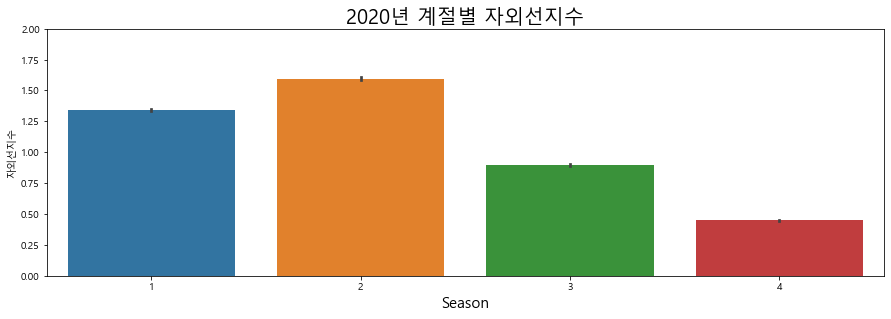

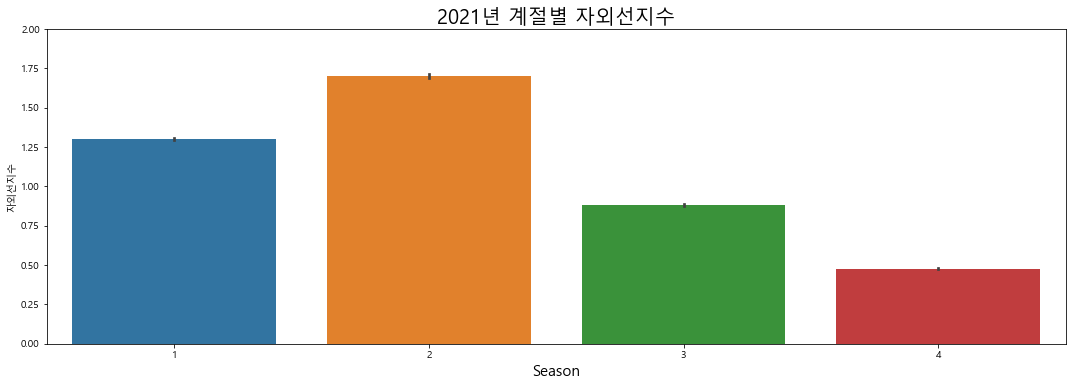

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x=df_2020.계절, y = df_2020.자외선지수)
plt.title('2020년 계절별 자외선지수', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylim(0,2)

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(x=df_2021.계절, y = df_2021.자외선지수)
plt.title('2021년 계절별 자외선지수', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylim(0,2)

plt.tight_layout()
plt.show()

## 월별 자외선 지수

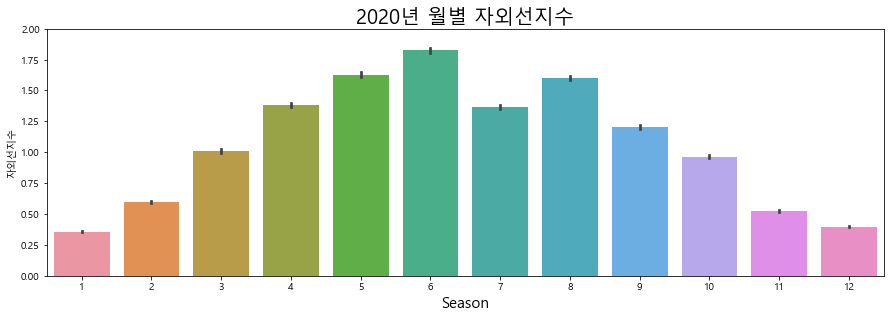

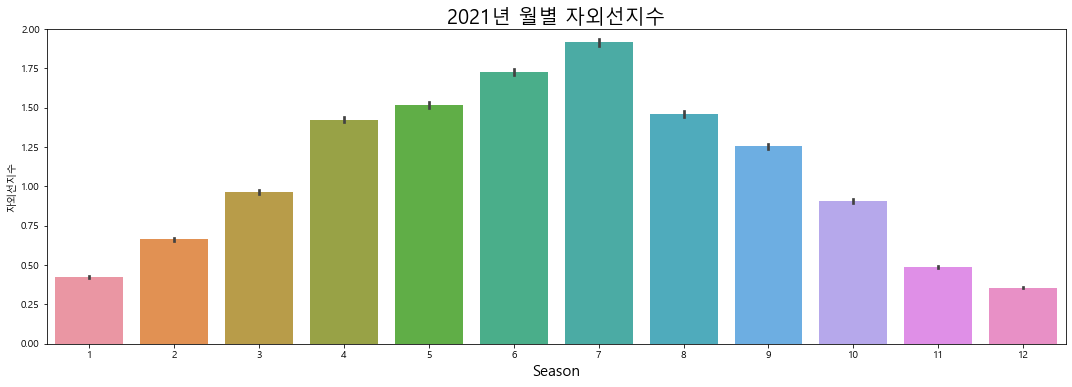

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.barplot(x=df_2020.Month, y = df_2020.자외선지수)
plt.title('2020년 월별 자외선지수', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylim(0,2)

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.barplot(x=df_2021.Month, y = df_2021.자외선지수)
plt.title('2021년 월별 자외선지수', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylim(0,2)

plt.tight_layout()
plt.show()

## 변수별 상관계수 - 변수들간의 선형성 파악

### 의미있는 상관계수만 확인하기 위하여 상관계수가 낮은 컬럼들을 삭제함

In [77]:
df_heatmap = df.drop(['위성천정각','관측고도','지면타입','Year','관측소지점'], axis=1)

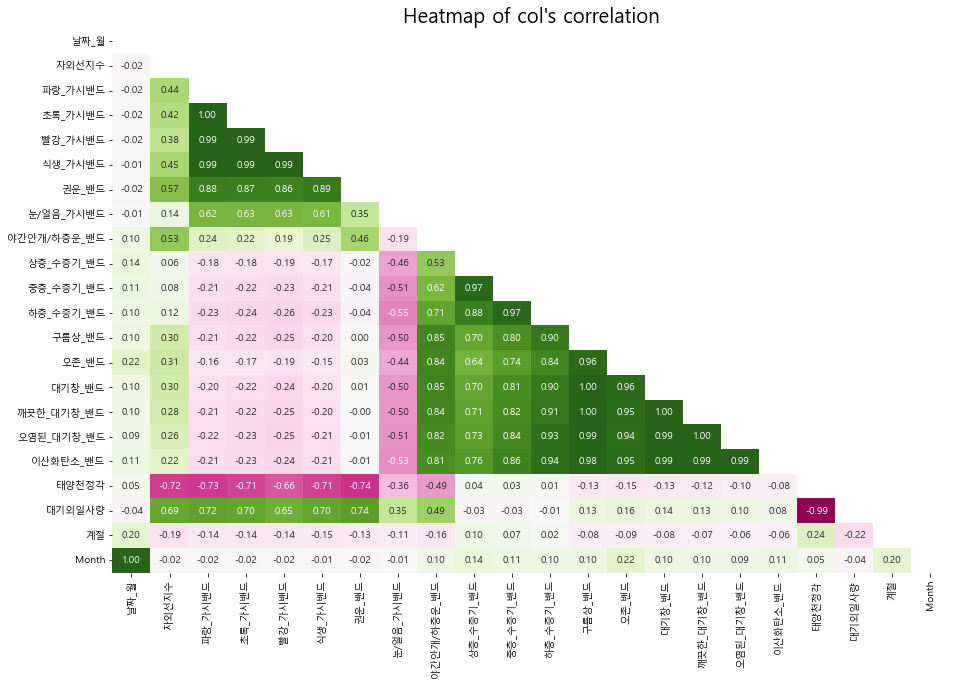

In [78]:
df_corr = df_heatmap.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True, cmap='PiYG', fmt='.2f',center=0, mask= mask , cbar=False)
plt.title("Heatmap of col's correlation", fontsize=20)
plt.show()

## 상관계수 0.6이상 스캐터

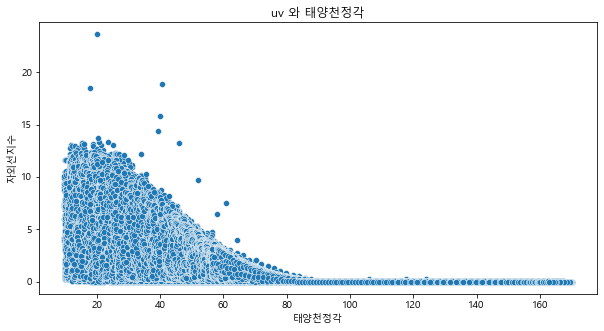

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.태양천정각,y=df.자외선지수)
plt.title('uv 와 태양천정각')
plt.show()

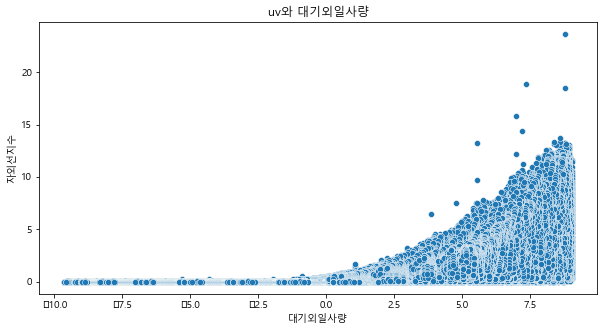

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.대기외일사량,y=df.자외선지수)
plt.title('uv와 대기외일사량')
plt.show()

## 지점별 자외선 지수 분포

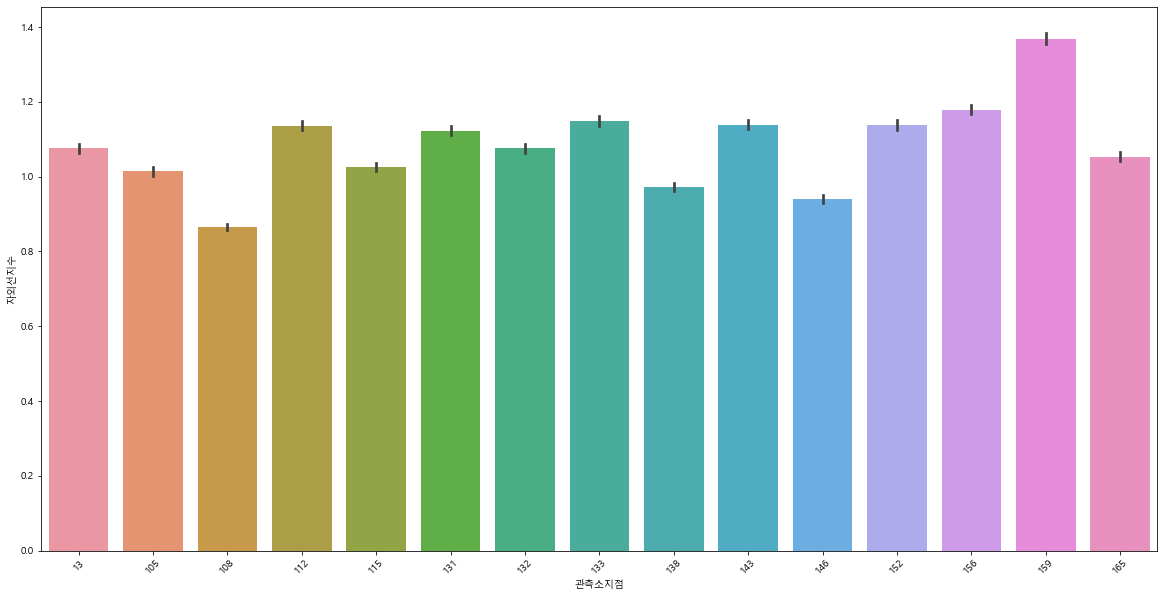

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.관측소지점, y=df.자외선지수)
plt.xticks(rotation=45)
plt.show()

 [링크 텍스트](https://)## 지면 타입별 평균 자외선 지수
### 0,4:습지 혹은 해안가 , 2: 농지, 3: 도시

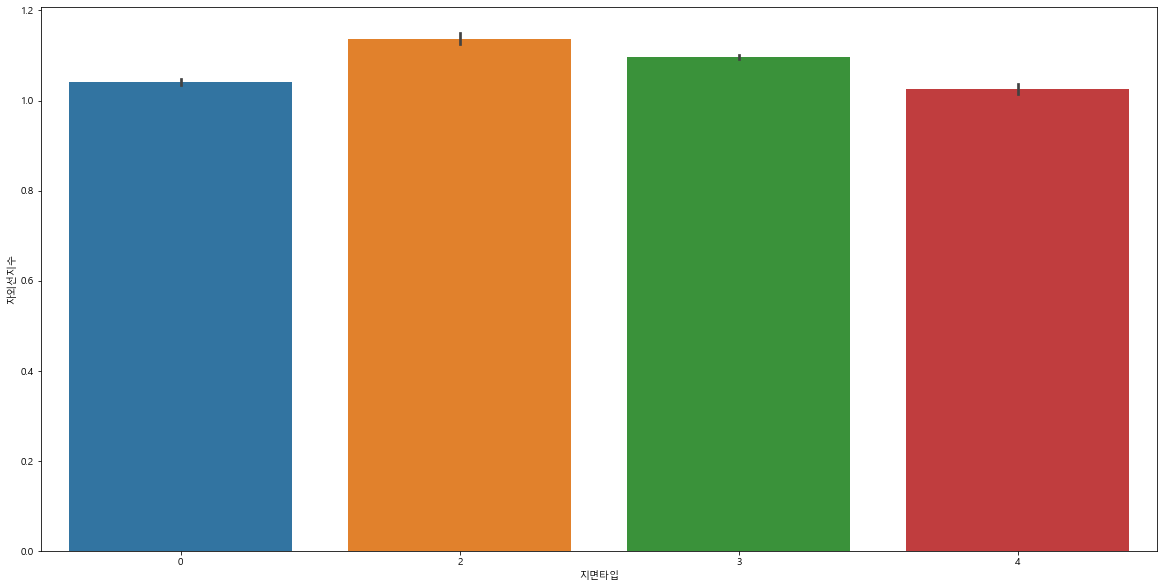

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.지면타입, y=df.자외선지수)
plt.show()

## 계절별 자외선 지수 분포

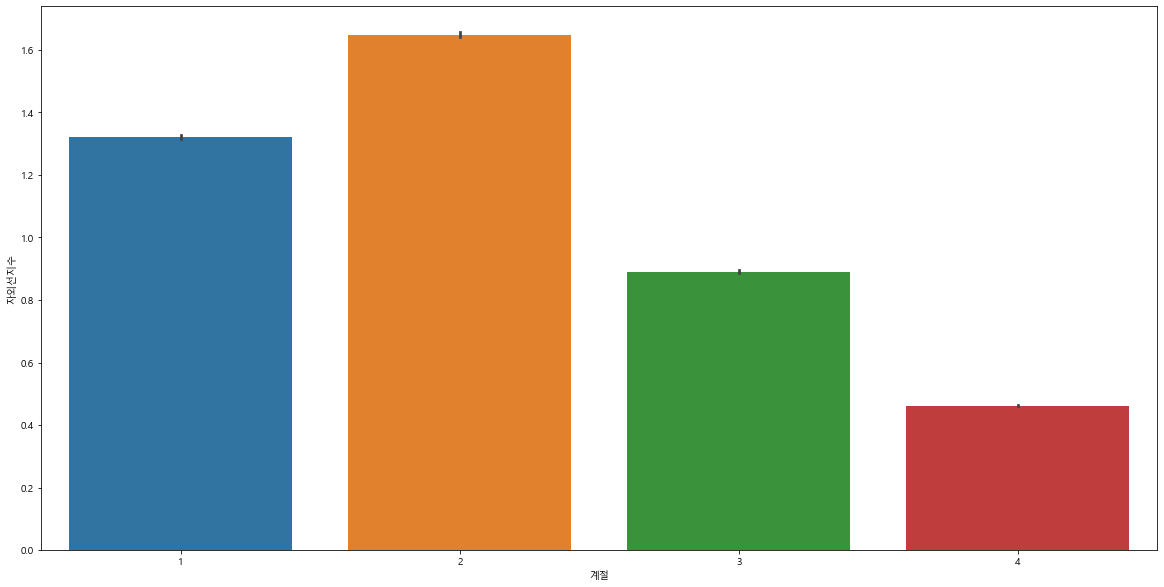

In [83]:
plt.figure(figsize=(20,10))
sns.barplot(x=df.계절, y=df.자외선지수)
plt.show()

# 모델링

# 모델

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate,KFold

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

In [99]:
X = df1.drop(['자외선지수','지면타입'],axis=1)
y = df1['자외선지수']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35,random_state=42)

k_fold = KFold(n_splits=10, shuffle=True) 
scoring = {'r2_score' : make_scorer(r2_score), 
          'mean_squared_error' : make_scorer(mean_squared_error),
          'mean_absolute_error' : make_scorer(mean_absolute_error)}

# MLP Reg

In [87]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

MLPRegressor()

In [88]:
mlp_pred = mlp.predict(X_test)
print('mlp_regression_r2_score : ', r2_score(y_test,mlp_pred))
print('mlp_regression_RMSE : ', mean_squared_error(mlp_pred, y_test, squared = False))
print('mlp_regression_mae : ', mean_absolute_error(y_test, mlp_pred))

mlp_regression_r2_score :  0.9378465607758867
mlp_regression_RMSE :  0.5876204743234208
mlp_regression_mae :  0.2851899379621118


In [89]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# GBT Reg

In [101]:
model1 = GradientBoostingRegressor(n_estimators =200,
                                   max_depth = 8,
                                   min_samples_split = 4,
                                   learning_rate = 0.01,
                                   random_state = 42)

model1.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, min_samples_split=4,
                          n_estimators=200, random_state=42)

In [102]:
y_pred1 = model1.predict(X_test)
print('검증 데이터 R2, RMSE')
print('\n')
print('R2_Score :', r2_score(y_pred1, y_test))
print('RMSE :',mean_squared_error(y_pred1, y_test, squared=False))
print('MAE :',mean_absolute_error(y_pred1, y_test))

검증 데이터 R2, RMSE


R2_Score : 0.8911629659447681
RMSE : 0.6507023934102157
MAE : 0.39654362197139276


In [103]:
model1.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# histGBT Reg

In [104]:
model2 = HistGradientBoostingRegressor(learning_rate = 0.1,
                                       max_iter = 200,
                                       max_depth = 10,
                                       quantile = 0.8,
                                       random_state = 42)
model2.fit(X_train,y_train)

HistGradientBoostingRegressor(max_depth=10, max_iter=200, quantile=0.8,
                              random_state=42)

In [105]:
y_pred2 = model2.predict(X_test)
print('검증 데이터 R2, RMSE')
print('\n')
print('R2_Score :', r2_score(y_pred2, y_test))
print('RMSE :',mean_squared_error(y_pred2, y_test, squared=False))
print('MAE :',mean_absolute_error(y_pred2, y_test))

검증 데이터 R2, RMSE


R2_Score : 0.9433456627725754
RMSE : 0.5452417952386729
MAE : 0.2517456615165138


In [106]:
model2.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': 10,
 'max_iter': 200,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'quantile': 0.8,
 'random_state': 42,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Voting Reg

In [107]:
vo1 = VotingRegressor(estimators=[('GBT',model1),('histGBT R',model2)])
vo1.fit(X_train,y_train)

VotingRegressor(estimators=[('GBT',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=8,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42)),
                            ('histGBT R',
                             HistGradientBoostingRegressor(max_depth=10,
                                                           max_iter=200,
                                                           quantile=0.8,
                                                           random_state=42))])

In [108]:
y_pred3 = vo1.predict(X_test)
print('검증 데이터 R2, RMSE')
print('\n')
print('R2_Score :', r2_score(y_pred3, y_test))
print('RMSE :',mean_squared_error(y_pred3, y_test, squared=False))
print('MAE :',mean_absolute_error(y_pred3, y_test))

검증 데이터 R2, RMSE


R2_Score : 0.9272881760511786
RMSE : 0.5744605798039231
MAE : 0.31134212828515


# 